In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import calendar
from pandas.tseries import offsets
import os
from datetime import date
import holidays

%matplotlib inline  

blues = [x for x in reversed(sns.color_palette("Blues_d", 11))]

In [2]:
import os
print(os.getcwd())
computer_path= ""
for x in os.getcwd().split("\\"):
    print(x)
    computer_path=computer_path+x+"\\"
    if x == "OneDrive - Cardiff University":
        break    
print(computer_path)

C:\Users\sceac10\OneDrive - Cardiff University\05 - Python\02 - Warwick
C:
Users
sceac10
OneDrive - Cardiff University
C:\Users\sceac10\OneDrive - Cardiff University\


In [3]:
path = computer_path+ '/04 - Projects/02 - Warwick/04 - Data/System data/'
files=  ['Electricity demand.csv', 'Heat demand.csv']
file = "Warwick data.csv"

In [4]:
def cleanAndPrepare(data, meterName):
    data["Date"]=data["Date"] + " " +data["StartTime"]
    data["Date"] = pd.to_datetime(data["Date"], format="%d/%m/%Y %H:%M")
    data.set_index("Date", drop=True, inplace=True)
    data.drop(["Meter", "Name", "SerialNumber", "Register", "StartTime", "Duration", "TotalValue", "Unit"], axis=1, inplace=True)
    data.columns = [meterName]

In [5]:
frames = []

for filename in files:
    data = pd.read_csv(path+filename)
    meterName = filename.split(".csv")[0]
    cleanAndPrepare(data, meterName)
    print(filename + " has " + '{:d}'.format(data[meterName].isnull().sum()) + " missing data")
    frames.append(data)

result = pd.concat(frames,axis=1)
result.set_index(pd.date_range(start=result.index[0], end=result.index[-1], freq='30T' ), inplace=True)
result.head()

Electricity demand.csv has 0 missing data
Heat demand.csv has 0 missing data


,Electricity demand,Heat demand
2016-01-01 00:00:00,2536,1.501
2016-01-01 00:30:00,2519,1.499
2016-01-01 01:00:00,2539,1.501
2016-01-01 01:30:00,2525,1.399
2016-01-01 02:00:00,2518,1.601


In [6]:
data = pd.read_csv(path+file)
data["Date"]=data["Date"] + " " +data["StartTime"]
data["Date"] = pd.to_datetime(data["Date"], format="%d/%m/%Y %H:%M")
data.set_index("Date", drop=True, inplace=True)
data.drop(["Meter", "StartTime"], axis=1, inplace=True)
data.head()

,Heat storage (MWh),Heat demand (MWh),Total heat output (m3),Total heat output (MWh),Energy centre gas (kWh),CHP1 elec (kWh),CHP2 elec (kWh),CHP3 elec (kWh),Total elec from CHP (kWh),District Output DeltaT (Celsius),Electricity demand (kWh)
Date,,,,,,,,,,,
2016-01-01 00:00:00,-0.603,2.227,124.3,2.83,4476,0,693,0,693,19.602,2536
2016-01-01 00:30:00,0.136,2.726,108.1,2.59,5240,0,693,0,693,20.628,2519
2016-01-01 01:00:00,-0.137,2.283,104.7,2.42,4585,0,692,0,692,19.9,2539
2016-01-01 01:30:00,-0.420,1.850,99.8,2.27,4257,0,693,0,693,19.583,2525
2016-01-01 02:00:00,-0.810,2.590,144.3,3.40,5022,0,693,0,693,20.286,2518


In [7]:
result["Hour"] = result.index.hour
result["DayOfWeek_name"]= [calendar.day_name[x] for x in result.index.dayofweek]
result["DayOfWeek"]= result.index.dayofweek
result["Month"] = result.index.month
result["Weekday"] = [1 if x<5 else 0 for x in result.index.dayofweek]
result["HH"] = [x%48 for x in range(0, result.shape[0], 1) ]
# result["Holiday"]= [1 if x.date() in uk_hol else 0 for x in result.index]
result["Date"] = result.index.date
result["Week"] = result.index.week

def get_season(row):
    if row['Month'] >= 3 and row['Month'] <= 5:
        return 'Spring'
    elif row['Month'] >= 6 and row['Month'] <= 8:
        return 'Summer'
    elif row['Month'] >= 9 and row['Month'] <= 11:
        return 'Autumn'
    else:
        return 'Winter'

season_dict = {"Winter":1, "Spring":2, "Summer":3, "Autumn":4}
inv_season_dict = {v: k for k, v in season_dict.items()}
result['Season'] = result.apply(get_season, axis=1)
result['Season num'] = result['Season']
result.replace({"Season num":season_dict}, inplace=True)
result.head()

,Electricity demand,Heat demand,Hour,DayOfWeek_name,DayOfWeek,Month,Weekday,HH,Date,Week,Season,Season num
2016-01-01 00:00:00,2536,1.501,0,Friday,4,1,1,0,2016-01-01,53,Winter,1
2016-01-01 00:30:00,2519,1.499,0,Friday,4,1,1,1,2016-01-01,53,Winter,1
2016-01-01 01:00:00,2539,1.501,1,Friday,4,1,1,2,2016-01-01,53,Winter,1
2016-01-01 01:30:00,2525,1.399,1,Friday,4,1,1,3,2016-01-01,53,Winter,1
2016-01-01 02:00:00,2518,1.601,2,Friday,4,1,1,4,2016-01-01,53,Winter,1


C:\Anaconda\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


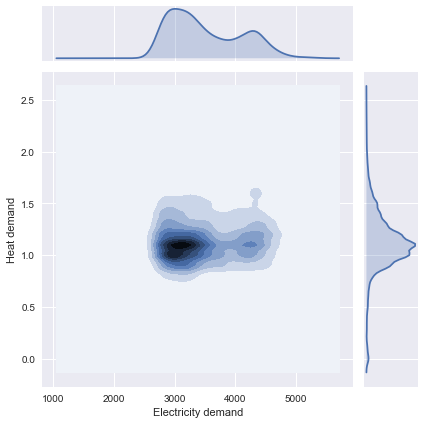

In [8]:
season="Summer"
g = sns.jointplot(x="Electricity demand", y="Heat demand", data=result.loc[result["Season"]==season, :], kind="kde", stat_func=None)
plt.savefig(path+season+"density-distribution.png")

In [9]:
season= "Summer"
bins_size = 10
H, xedges, yedges= np.histogram2d(x=result.loc[result["Season"]==season, "Electricity demand"], y=result.loc[result["Season"]==season, "Heat demand"], bins=bins_size)
H= H.T
length_data = result.loc[result["Season"]==season, :].shape[0]
histogram=pd.DataFrame(data=H/length_data, columns= xedges[1:], index=yedges[1:])
histogram.to_csv(path+"Histogram-"+season+".csv")

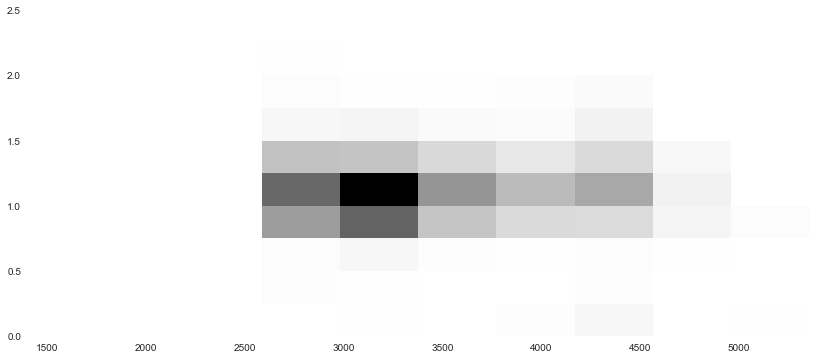

In [10]:
fig, ax = plt.subplots(figsize=(14, 6))
X, Y = np.meshgrid(xedges, yedges)
ax.pcolormesh(X, Y, H)

In [11]:
length_data = result.loc[result["Season"]=="Winter", :].shape[0]

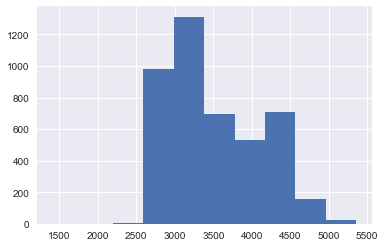

In [12]:
result.loc[result["Season"]==season, "Electricity demand"].hist()

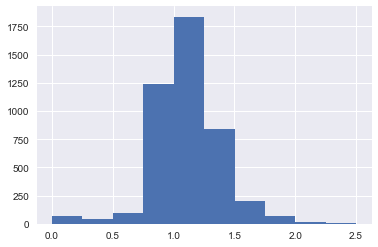

In [13]:
result.loc[result["Season"]==season, "Heat demand"].hist()

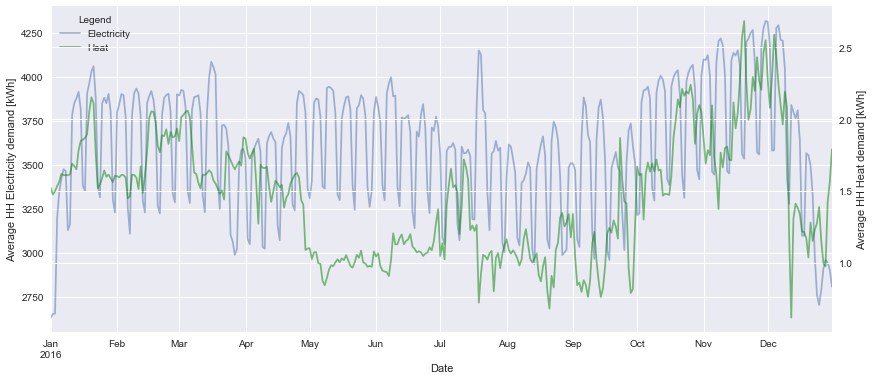

In [14]:
fig, ax = plt.subplots(figsize=(14, 6))
ax2 = ax.twinx()
result.loc[:, "Electricity demand"].resample('d').mean().plot(ax=ax, alpha=0.5, label="Electricity")
result.loc[:, "Heat demand"].resample('d').mean().plot(ax=ax2, color='green', alpha=0.5, label="Heat")
ax.set_xlabel("Date")
ax.set_ylabel("Average HH Electricity demand [kWh]")
ax2.set_ylabel("Average HH Heat demand [kWh]")

lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines= lines+lines2
labels=labels+labels2
ax.legend(lines, labels, title="Legend")
plt.savefig(path+"annual-demand.png")

In [15]:
df = pd.read_csv(path+"Electricity load 2015-2016.csv")
cleanAndPrepare(df, "Electricity")

In [16]:
df["HH"] = [x%48 for x in range(0, df.shape[0], 1) ]
df["Date"] = df.index.date
df.head()

,Electricity,HH,Date
Date,,,
2015-11-01 00:00:00,3024.0,0,2015-11-01
2015-11-01 00:30:00,2952.0,1,2015-11-01
2015-11-01 01:00:00,2919.0,2,2015-11-01
2015-11-01 01:30:00,2899.0,3,2015-11-01
2015-11-01 02:00:00,2864.0,4,2015-11-01


In [17]:
daybyHH = df.groupby(["Date", "HH"]).mean()
daybyHH=daybyHH.unstack("HH").reset_index()
daybyHH["Date"]=pd.to_datetime(daybyHH["Date"], format="%Y-%m-%d")
daybyHH.set_index("Date", inplace=True, drop=True)
# daybyHH.dropna(how='any', inplace=True)
daybyHH.head()

Electricity                                                  \
HH                  0       1       2       3       4       5       6    
Date                                                                     
2015-11-01      3024.0  2952.0  2919.0  2899.0  2864.0  2837.0  2787.0   
2015-11-02      2960.0  2882.0  2848.0  2792.0  2758.0  2730.0  2706.0   
2015-11-03      3121.0  3011.0  2982.0  2924.0  2893.0  2858.0  2836.0   
2015-11-04      3149.0  3046.0  3022.0  2967.0  2932.0  2885.0  2873.0   
2015-11-05      3204.0  3132.0  3034.0  2989.0  2938.0  2923.0  2864.0   

                                     ...                                    \
HH              7       8       9    ...        38      39      40      41   
Date                                 ...                                     
2015-11-01  2792.0  2752.0  2748.0   ...    3589.0  3506.0  3427.0  3389.0   
2015-11-02  2694.0  2701.0  2683.0   ...    4143.0  4041.0  3913.0  3791.0   
2015-11-03  2821.0  2818.0  2786.0   ...    4130.0  4146.0  3967.0  3828.0   
2015-11-04  2849.0  2865.0  2846.0   ...    4210.0  4069.0  3928.0  3794.0   
2015-11-05  2857.0  2849.0  2838.0   ...    4149.0  4070.0  3908.0  3783.0   

                                                            
HH              42      43      44      45      46      47  
Date                                                        
2015-11-01  3327.0  3286.0  3187.0  3160.0  3113.0  3052.0  
2015-11-02  3702.0  3581.0  3483.0  3392.0  3283.0  3208.0  
2015-11-03  3692.0  3600.0  3486.0  3399.0  3319.0  3275.0  
2015-11-04  3688.0  3608.0  3497.0  3387.0  3328.0  3263.0  
2015-11-05  3693.0  3588.0  3483.0  3404.0  3342.0  3256.0  

[5 rows x 48 columns]

In [18]:
from sklearn.cluster import KMeans
from sklearn import metrics

def cluster(values):
    algorithm = "elkan"
    max_silhouette = 0.
    max_nb_values_over = 0.
    cluster_centers=[]
    cluster_labels=[]
    for n_clusters in range(2, 17, 1):
        kmeans = KMeans(n_clusters=n_clusters, random_state=10, algorithm="elkan", n_init=30).fit(values)
        labels_temp= kmeans.labels_
        silhouette_avg = metrics.silhouette_score(values, labels_temp)
        
        silhouette_samples_values = metrics.silhouette_samples(values, labels_temp)
        calinski_harabaz_score= metrics.calinski_harabaz_score(values, labels_temp)
        nb_values_over = 0
        print("cluster:", n_clusters , "silhouette score:" ,silhouette_avg, "calinski_harabaz:",calinski_harabaz_score )
#         if max_silhouette<silhouette_avg:
#             max_silhouette=silhouette_avg
#             cluster_centers= kmeans.cluster_centers_
#             cluster_labels= labels_temp


        nb_values_over = len(silhouette_samples_values[np.where(silhouette_samples_values>silhouette_avg)])
        print("Number of values over average:", nb_values_over, "({:04.1f}%)".format(nb_values_over/len(values)*100)) 
        
        if max_nb_values_over<nb_values_over:
            max_nb_values_over=nb_values_over
            cluster_centers= kmeans.cluster_centers_
            cluster_labels= labels_temp

        
    return cluster_centers.shape[0], cluster_centers, cluster_labels

In [19]:
nb_clusters, cluster_centers, cluster_labels = cluster(daybyHH["Electricity"].values)
daybyHH["Labels Kmeans"] = cluster_labels
daybyHH.set_index("Labels Kmeans", append=True, inplace=True)


cluster: 2 silhouette score: 0.672143935586 calinski_harabaz: 458.115689353
Number of values over average: 83 (54.6%)
cluster: 3 silhouette score: 0.668256329702 calinski_harabaz: 545.57732731
Number of values over average: 104 (68.4%)
cluster: 4 silhouette score: 0.660132883436 calinski_harabaz: 619.406911523
Number of values over average: 105 (69.1%)
cluster: 5 silhouette score: 0.639182209882 calinski_harabaz: 602.352411347
Number of values over average: 102 (67.1%)
cluster: 6 silhouette score: 0.450042971148 calinski_harabaz: 621.337782566
Number of values over average: 76 (50.0%)
cluster: 7 silhouette score: 0.435244262302 calinski_harabaz: 605.559466038
Number of values over average: 76 (50.0%)
cluster: 8 silhouette score: 0.410834463304 calinski_harabaz: 581.658870632
Number of values over average: 68 (44.7%)
cluster: 9 silhouette score: 0.416554391693 calinski_harabaz: 563.239420503
Number of values over average: 70 (46.1%)
cluster: 10 silhouette score: 0.375913594283 calinski_

In [20]:
df_to_plot= daybyHH.reorder_levels(["Labels Kmeans", "Date"], axis=0)
df_to_plot=  df_to_plot["Electricity"].sort_index(axis=0).transpose()
df_to_plot.head()

Labels Kmeans          0                                              \
Date          2015-11-01 2015-11-07 2015-11-08 2015-11-14 2015-11-15   
HH                                                                     
0                 3024.0     3116.0     3010.0     3155.0     3113.0   
1                 2952.0     3043.0     2952.0     3079.0     3035.0   
2                 2919.0     2991.0     2894.0     3025.0     2999.0   
3                 2899.0     2954.0     2902.0     2974.0     2986.0   
4                 2864.0     2895.0     2870.0     2933.0     2937.0   

Labels Kmeans                                                         \
Date          2015-11-21 2015-11-22 2015-11-28 2015-11-29 2015-12-05   
HH                                                                     
0                 3203.0     3257.0     3158.0     3129.0     3190.0   
1                 3113.0     3141.0     3095.0     3065.0     3127.0   
2                 3070.0     3114.0     3069.0     3045.0     3079.0   
3                 3050.0     3060.0     3042.0     3023.0     3054.0   
4                 3004.0     3037.0     2987.0     3046.0     3017.0   

Labels Kmeans    ...              3                                   \
Date             ...     2015-12-21 2016-01-04 2016-01-05 2016-01-06   
HH               ...                                                   
0                ...         2628.0     2568.0     2716.0     2841.0   
1                ...         2585.0     2526.0     2708.0     2804.0   
2                ...         2595.0     2529.0     2710.0     2775.0   
3                ...         2586.0     2517.0     2698.0     2787.0   
4                ...         2592.0     2531.0     2683.0     2720.0   

Labels Kmeans                                                         \
Date          2016-01-07 2016-01-08 2016-03-24 2016-03-29 2016-03-30   
HH                                                                     
0                 2848.0     2967.0     3117.0     2868.0     3009.0   
1                 2815.0     2890.0     3047.0     2847.0     2965.0   
2                 2781.0     2884.0     3046.0     2861.0     2973.0   
3                 2765.0     2869.0     2997.0     2867.0     2949.0   
4                 2759.0     2834.0     2992.0     2830.0     2930.0   

Labels Kmeans             
Date          2016-03-31  
HH                        
0                 2995.0  
1                 2956.0  
2                 2970.0  
3                 2944.0  
4                 2935.0  

[5 rows x 152 columns]

0
1
2
3


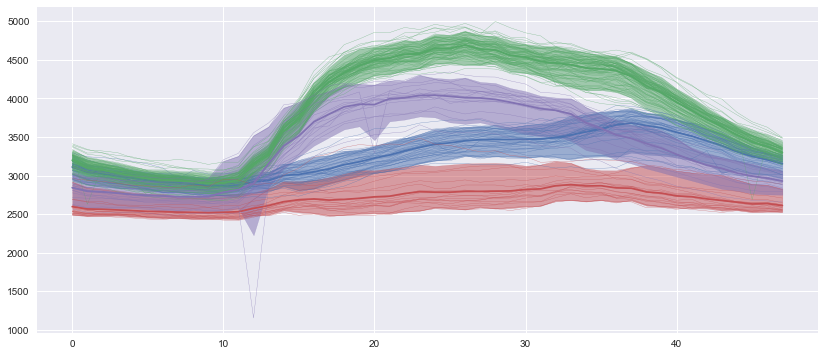

In [21]:
fig, ax = plt.subplots(figsize=(14, 6))
color=["blue", "green", "black"]
x=[val for val in df_to_plot.index]
for n_cluster in range(nb_clusters):
    print(n_cluster)
    y1= df_to_plot.loc[:, n_cluster].quantile(0.05, axis=1).values
    y2= df_to_plot.loc[:, n_cluster].quantile(0.95, axis=1).values
    ax.fill_between(x, y1, y2, color=sns.color_palette()[n_cluster], alpha=0.5)
    plt.plot(x, cluster_centers[n_cluster], color=sns.color_palette()[n_cluster], alpha=1)
    plt.plot(x, df_to_plot.loc[:, n_cluster], color=sns.color_palette()[n_cluster], alpha=0.8, linewidth=0.3)
    
plt.savefig(path+"cluster_electricity_winter.png")